In [2]:
### Importing Libraries
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
### Importing dataset from the local drive
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [9]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [10]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [11]:
df.columns = ["ds","y"]

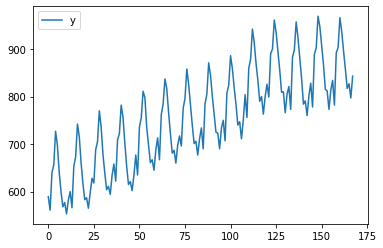

In [12]:
### Plotting the data
df.plot()

In [14]:
# Converting date column to datatime format
df['ds'] = pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


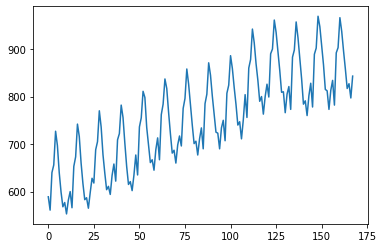

In [16]:
df['y'].plot()

In [ ]:
# Importing Prophet
from fbprophet import Prophet
dir(Prophet)

In [ ]:
### model building and fitting the data
model = Prophet()
model.fit(df)

In [20]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [21]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [22]:
# Create future dates for 365 days
future_dates = model.make_future_dataframe(periods=365)

In [25]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [26]:
# Predicting future data
prediction = model.predict(future_dates)

In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.848249,576.508398,596.598207,606.848249,606.848249,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,0.0,0.0,0.0,586.774860
1,1962-02-01,608.572034,536.248797,555.724850,608.572034,608.572034,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,0.0,0.0,0.0,546.014381
2,1962-03-01,610.129000,631.915208,651.858401,610.129000,610.129000,31.436665,31.436665,31.436665,31.436665,31.436665,31.436665,0.0,0.0,0.0,641.565665
3,1962-04-01,611.852785,648.843690,668.334357,611.852785,611.852785,46.730075,46.730075,46.730075,46.730075,46.730075,46.730075,0.0,0.0,0.0,658.582860
4,1962-05-01,613.520963,711.763943,731.528543,613.520963,613.520963,108.043261,108.043261,108.043261,108.043261,108.043261,108.043261,0.0,0.0,0.0,721.564225


In [28]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,814.771653,803.133419,825.501485
529,1976-11-27,818.063163,806.471581,828.910923
530,1976-11-28,821.527358,810.103664,833.207662
531,1976-11-29,825.098612,814.044548,836.086957
532,1976-11-30,828.704359,817.867142,839.097871



## **Plotting the Forecasts** :
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.
*italicized text*

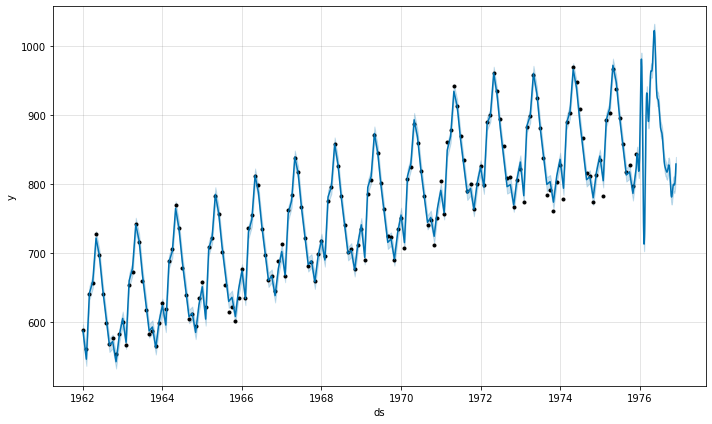

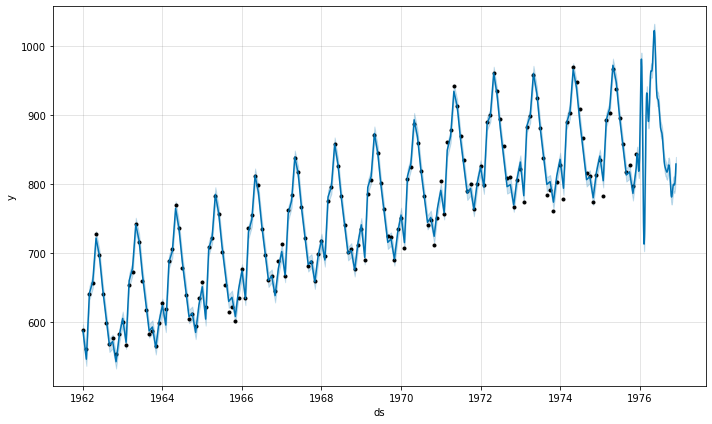

In [29]:
model.plot(prediction)

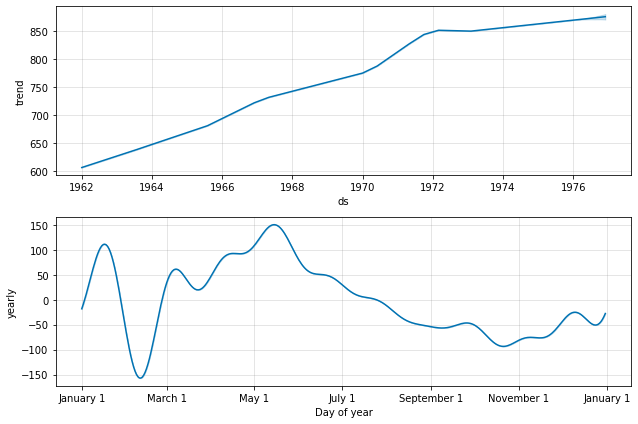

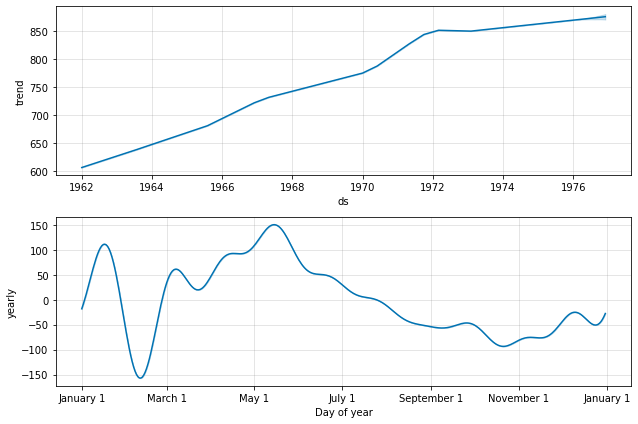

In [30]:
# Visualize Each Component
model.plot_components(prediction)


# Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

horizon the forecast horizon
initial the size of the initial training period
period the spacing between cutoff dates

In [31]:
# cross Validation
from fbprophet.diagnostics import cross_validation

In [32]:
df_cv = cross_validation(model, horizon='365 days', period='180 days', initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [35]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.716644,840.540967,860.950092,858,1974-12-01
248,1975-09-01,808.304147,797.623888,818.459912,817,1974-12-01
249,1975-10-01,811.731165,801.587039,822.086615,827,1974-12-01
250,1975-11-01,779.755821,769.622794,790.544060,797,1974-12-01
251,1975-12-01,814.315812,803.768663,824.860951,843,1974-12-01



## Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [36]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,256.280704,16.008770,12.605681,0.016238,0.014528,0.36
1,41 days,254.154295,15.942217,12.519149,0.016164,0.014528,0.36
2,42 days,269.044308,16.402570,12.982869,0.016809,0.014573,0.32
3,43 days,269.417584,16.413945,13.091628,0.016979,0.014573,0.32
4,46 days,254.738535,15.960531,12.733113,0.016470,0.014528,0.32


In [37]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,256.280704,16.008770,12.605681,0.016238,0.014528,0.36
1,41 days,254.154295,15.942217,12.519149,0.016164,0.014528,0.36
2,42 days,269.044308,16.402570,12.982869,0.016809,0.014573,0.32
3,43 days,269.417584,16.413945,13.091628,0.016979,0.014573,0.32
4,46 days,254.738535,15.960531,12.733113,0.016470,0.014528,0.32
...,...,...,...,...,...,...,...
180,357 days,883.555921,29.724669,22.578166,0.028414,0.021636,0.40
181,360 days,691.016235,26.287188,19.509914,0.024239,0.017204,0.44
182,361 days,677.979698,26.038043,19.103678,0.023827,0.014700,0.44
183,362 days,660.832803,25.706668,18.391152,0.023011,0.013880,0.48


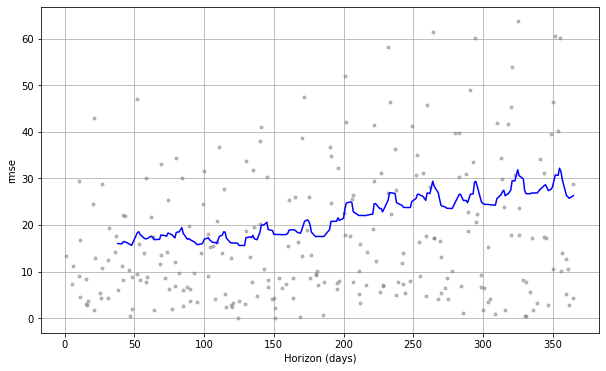

In [38]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

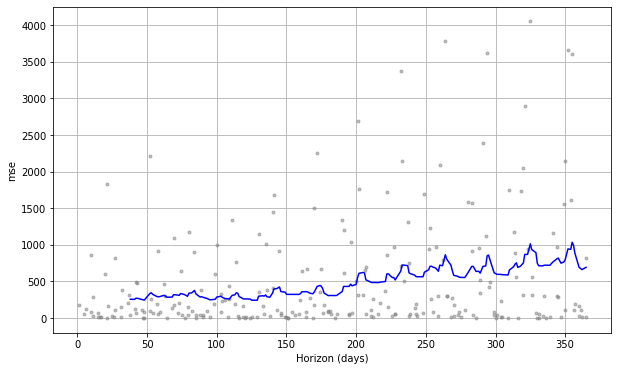

In [39]:
fig_mse = plot_cross_validation_metric(df_cv, metric = 'mse')

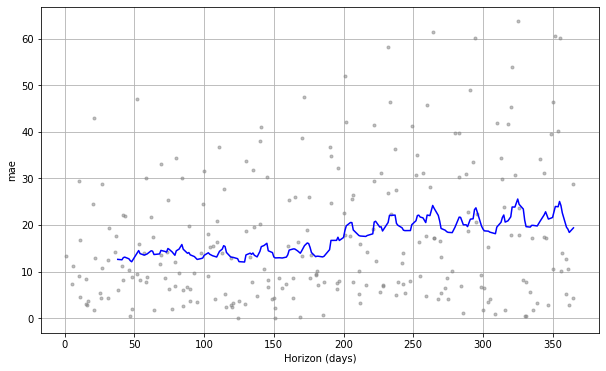

In [40]:
fig_mae = plot_cross_validation_metric(df_cv, metric = 'mae')

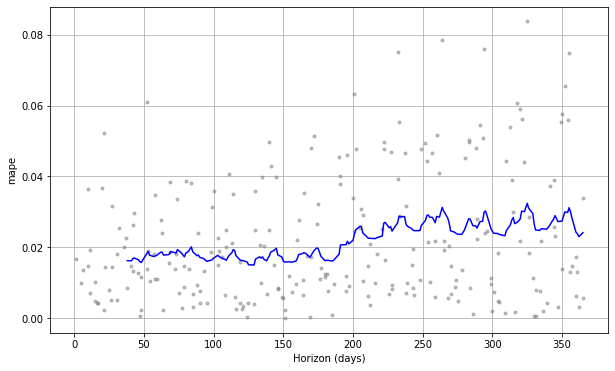

In [41]:
fig_mape = plot_cross_validation_metric(df_cv, metric = 'mape')

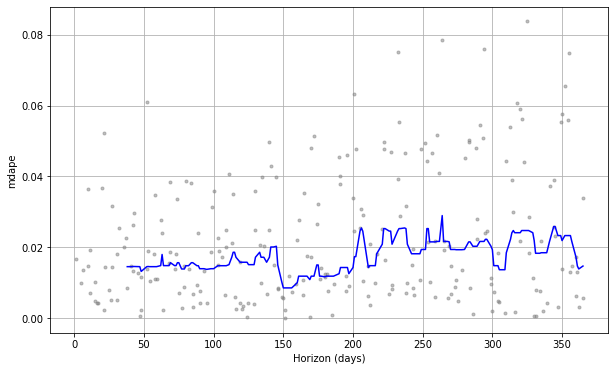

In [42]:
fig_mdape = plot_cross_validation_metric(df_cv, metric = 'mdape')